In [1]:
import sys
sys.path.append('scripts')
from demo_utils import init_LocalDiff, get_Ea
import numpy
import torch
from rdkit import Chem

Using backend: pytorch


In [2]:
# Load the model and necessary files for prediction decoding
device = torch.device('cpu')
model_path = 'models/LocalDiff.pth'
config_path = 'data/configs/default_config.json'

args = {'model_path': model_path, 'config_path': config_path, 'device': device}
model, graph_function = init_LocalDiff(args)

Parameters of loaded LocalDiff:
{'edge_hidden_feats': 16, 'node_out_feats': 128, 'num_step_message_passing': 3, 'in_node_feats': 74, 'in_edge_feats': 13}


Predicted Ea: 66.105
Reactant and Product:


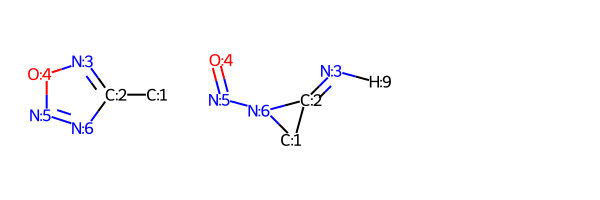

In [3]:
rsmi = '[C:1]([c:2]1[n:3][o:4][n:5][n:6]1)([H:7])([H:8])[H:9]'
psmi = '[C:1]1([H:7])([H:8])/[C:2](=[N:3]\[H:9])[N:6]1[N:5]=[O:4]'
Ea = get_Ea(rsmi, psmi, args, model, graph_function)
print ('Predicted Ea: %.3f' % Ea)
print ('Reactant and Product:')
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in [rsmi, psmi]])